While most times the dream-team and the best players can be subjective. However for the course of this study we will analyze the 11 best players to put in a team *(assuming random players on the bench)* based on the statistical data available about the players.  

In [ ]:
# -*- coding: utf-8 -*-
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import seaborn as sns
import warnings 

In [ ]:
# Reading the csv file to transform it to a dataframe
df=pd.read_csv('EA FIFA 19.csv')
#df=pd.read_csv('FIFA19.csv', usecols= ["Name","Age","Nationality","Overall","Position","GKDiving","GKHandling","GKKicking","GKPositioning","GKReflexes"])

# Eliminating the Euro symbol,'K'(stands for thousands) and 'M'(stands for million) from the Wage and Value column for further calculations 
df['Wage']=df['Wage'].str.replace('€','')
df['Wage']=df['Wage'].str.replace('K','')
df['Value']=df['Value'].str.replace('€','')
df['Value']=df['Value'].str.replace('M','')
df['Release Clause']=df['Release Clause'].str.replace('€','')
df['Release Clause']=df['Release Clause'].str.replace('M','')
df['Release Clause']=df['Release Clause'].str.replace('K','')

# Defining the best players 

best_players=df.iloc[df.groupby(df['Position'])['Overall'].idxmax()]

# Defining the dream team

dreamteam=best_players[best_players['Position'].isin(['CAM','GK','RF','LF','LCM','RCM','CDM','LB','LCB','RCB','RB'])]

In [ ]:
dream_display = dreamteam[['Name','Age','Position','Nationality','Wage','Value','Overall']].reset_index(drop=True)
dream_display

All the players in the dream team are displayed above 

In [ ]:
dreamteam['Wage']=dreamteam['Wage'].astype(str).astype(int)
dreamteam['Value']=dreamteam['Value'].astype(str).astype(float)
dreamteam['Release Clause']=dreamteam['Release Clause'].astype(str).astype(float)

#Printing the datatypes 
dreamteam[['Name','Age','Position','Nationality','Wage','Value']].dtypes

In [ ]:
#Defining the Goalkeepers
Goalkeepers=df[df['Position'].values  == "GK"] 

#Findng the top 5 goalkeepers with respect to the OVERALL RATING

gk=Goalkeepers.head(5)

In [ ]:
#Altering the dataframe for Goalkeeper stats

df_goalkeeper = pd.DataFrame(gk, columns = ['Name', 'GKDiving', 'GKHandling', 'GKKicking','GKPositioning','GKReflexes'])
pos = list(range(len(gk['GKDiving']))) 
width = 0.15 

#Plotting the Goalkeeper bar graph
 
fig, ax = plt.subplots(figsize=(14,5))
plt.bar(pos, 
        df_goalkeeper['GKDiving'], 
        width, 
        alpha=0.5, 
        color='#EE3224', 
        label=gk.iloc[0,0] ) 
plt.bar([p+ width for p in pos], 
        df_goalkeeper['GKHandling'], 
        width, 
        alpha=0.5, 
        color='#F78F1E', 
        label=gk.iloc[0,2]) 
plt.bar([p+ width*2 for p in pos], 
        df_goalkeeper['GKKicking'], 
        width, 
        alpha=0.5, 
        color='#e75480', 
        label=gk.iloc[0,3] )
plt.bar([p+ width*3 for p in pos], 
        df_goalkeeper['GKPositioning'], 
        width, 
        alpha=0.5, 
        color='#FF0000', 
        label=gk.iloc[0,4] )
plt.bar([p+ width*4 for p in pos], 
        df_goalkeeper['GKReflexes'], 
        width, 
        alpha=0.5, 
        color='#ffa500', 
        label=gk.iloc[0,5] )


ax.set_ylabel('Points')

# Set the chart's title
ax.set_title('GK scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(gk['Name'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(gk['GKDiving']+gk['GKHandling'])])

# Adding the legend and showing the plot
plt.legend(['GKDiving', 'GKHandling', 'GKKicking','GKPositioning','GKReflexes'], loc='upper left')
plt.grid()
plt.show()


It can be seen from the above graph that all of them are top tier goal keepers, but David De Gea beats the rest of them by a close margin at GK Reflexes and is thus selected for the dream-team. 

In [ ]:
#Printing the dream-team players with their basic information

dreamteam[['Name','Age','Position','Nationality','Wage','Value']]

#Converting the Wage, Value and Release clause columns from obj to int and float

dreamteam['Wage']=dreamteam['Wage'].astype(str).astype(int)

dreamteam['Value']=dreamteam['Value'].astype(str).astype(float)

dreamteam['Release Clause']=dreamteam['Release Clause'].astype(str).astype(float)


In [ ]:
#Plotting the Scatter plot for Age vs Stamina 

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Age'], y=df['Stamina'],
                    mode='markers',
                    name='markers'))
fig.update_layout(title='Age vs Stamina',
                   xaxis_title='Age',
                   yaxis_title='Stamina')
fig.show()

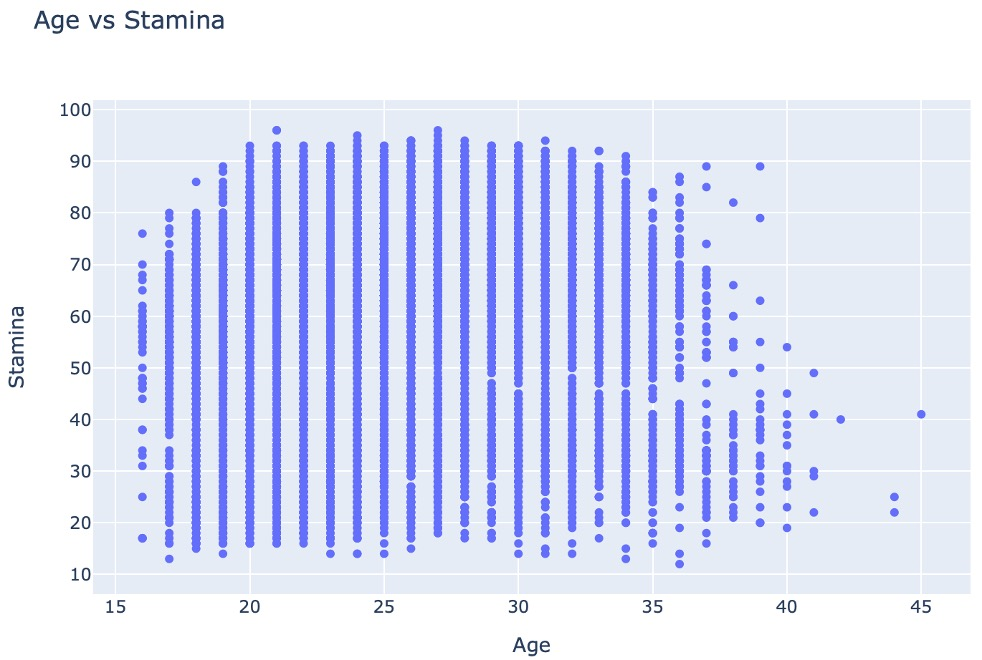

**Please refer to the .py file to interact with this visualization.**

The scatter plot is an interactive visualization which can be used to zoom in or out of a particular area for a broader and better understanding of the data.  

In [ ]:
df_1 = df[['Age','Stamina']].copy()
data = ['15-20', '21-25', '26-30', '31-35','36-40','41-45']
df_2 = pd.DataFrame(columns = ['Age Group','Avg. Stamina'])
df_2['Age Group'] = pd.Series(data)

In [ ]:
df_f  = df_1[(df_1['Age'] > 15) & (df['Age'] <= 20)]
df_f1 = df_1[(df_1['Age'] > 20) & (df['Age'] <= 25)]
df_f2 = df_1[(df_1['Age'] > 25) & (df['Age'] <= 30)]
df_f3 = df_1[(df_1['Age'] > 30) & (df['Age'] <= 35)]
df_f4 = df_1[(df_1['Age'] > 35) & (df['Age'] <= 40)]
df_f5 = df_1[(df_1['Age'] > 40) & (df['Age'] <= 45)]
df_f6 = df_1[(df_1['Age'] > 45) & (df['Age'] <= 50)]

avg = df_f.Stamina.mean()
avg_1 = df_f1.Stamina.mean()
avg_2 = df_f2.Stamina.mean()
avg_3 = df_f3.Stamina.mean()
avg_4 = df_f4.Stamina.mean()
avg_5 = df_f5.Stamina.mean()
avg_6 = df_f6.Stamina.mean()
#avg_7 = df_filtered_7.Stamina.mean()
data_2 = [avg,avg_1,avg_2,avg_3,avg_4,avg_5]
df_2['Avg. Stamina'] = data_2


In [ ]:
x = np.array([0,1,2,3,4,5])
y = df_2['Avg. Stamina']
my_xticks = ['15-20','21-25','26-30','31-35','36-40','41-45']
plt.figure(figsize=(25, 8))
plt.xlabel('Age Group')
plt.ylabel('Average Stamina')
plt.title('Age vs Stamina')
plt.subplot(131) 
plt.bar(my_xticks,y,)
plt.xlabel('Age Group')
plt.ylabel('Average Stamina')
plt.title('Age vs Stamina')
plt.subplot(132)
plt.xticks(x, my_xticks)
plt.plot(y,'b')
plt.xlabel('Age Group')
plt.ylabel('Average Stamina')
plt.title('Age vs Stamina')
plt.show()

It can be observed from the graphs above that, age affects stamina of the players. Stamina is at it's peak for players between the age 26-30. Stamina takes a hit as the age increases, especially in the late 30s, when we can see that the players' stamina has gone down after 35 years of age. There are a few exceptions though.

In [ ]:
#dreamteam.reset_index(inplace = True)
label_drop = ['index','Unnamed: 0','level_0']
#dreamteam = dreamteam.drop(label_drop,axis='columns')
dreamteam['Name'][1] = 'S.Busquets'
dreamteam['Name'][8] = 'S.Ramos'

In [ ]:
#Plotting the Lollipop Chart for Players vs their Wage
fig, ax = plt.subplots(figsize=(25,10))
ax.set_ylim(120, 600)

(markerline, stemlines, baseline) = ax.stem(dreamteam.Name, dreamteam.Wage, basefmt=' ',use_line_collection=True)
plt.setp(markerline, marker='*', markersize=24,
         markeredgewidth=2, color='red')
plt.setp(stemlines, color='blue')
plt.setp(baseline, visible=False)
xlab = plt.xlabel('Name of the Player', size=25)
plt.xticks(dreamteam.Name, size = 19)
plt.ylabel('Wage(thousands Euros)', size=25)
plt.yticks(size = 18)

Wagesum=dreamteam['Wage'].sum()
Wagesum=Wagesum*1000
print('The total wages of all the players of the Dream Team is',Wagesum,'Euros')


Valsum=dreamteam['Value'].sum()
print('The total Value of all the players of the Dream Team is',Valsum,' Million Euros')

From the above Lollipop chart, it can be clearly seen that Lionel Messi has the highest wage of all the players, which is quite obvious as he is considered to be the best player in the world after winning his 6th Ballon d'Or recenlty. The Ballon d'Or (French pronunciation: [balɔ̃ dɔʁ]; "Golden Ball") is an annual football award presented by France Football.

In [ ]:
# Plot a scatter plot of Value vs. Release clause

categories = np.unique(dreamteam['Value'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')

for i, Value in enumerate(categories):
    plt.scatter('Release Clause', 'Value', 
                data=dreamteam.loc[dreamteam.Value==Value, :], 
                s=200, c=colors[i], label=str(Value))

# Decorations
plt.gca().set(xlim=(30, 270), ylim=(10, 120),
              xlabel='Release Clause in Millions €', ylabel='Value in Millions € ')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Release Clause vs Value", fontsize=22)
plt.legend(fontsize=12)  

plt.legend(dreamteam['Name'],fontsize=12)

plt.show()   

The Scatter plot is somewhat a 45-degree straight line which shows that, the player’s release clauses are directly proportional to their valuation. This means that the team will not incur any significant financial loses even if any of these players decide to leave.

The Total Value of all the players of the Dream Team is 739.5 Million Euros 

In [ ]:
#Plotting the pie-chart 

import plotly.graph_objects as go
colors = ['gold', 'red', 'darkorange', 'lightgreen','purple','pink']

fig = go.Figure(data=[go.Pie(labels=dreamteam[['Nationality']],
                             values=[1,4,1,1,1,2,1])])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
fig.show()


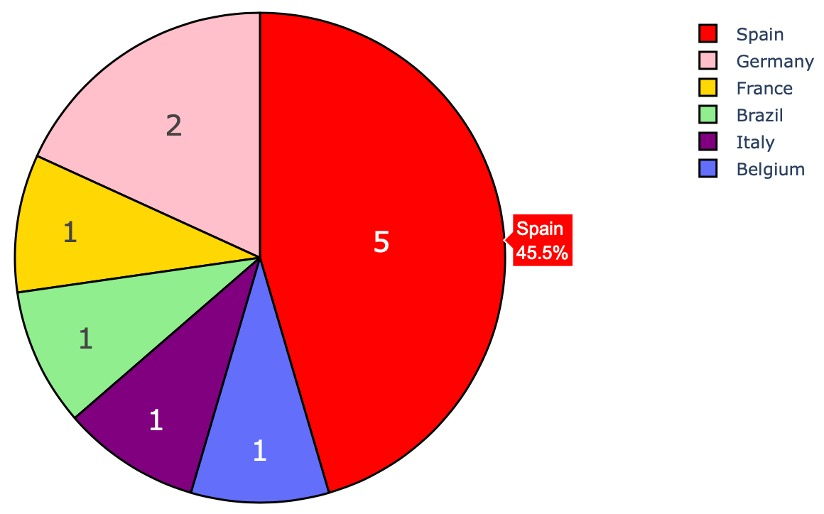

**Please refer to the .py file to interact with the above visualization**

Players from the same nationality help maintain relatability in the team and thus might increase co-ordination and team play. As same nationality means the players will speak the same language and will have similar cultural views. This might affect the team’s mindset. Although players from different nationalities does not mean it is a downside. Instead it can be looked at, as a more diverse team. 

Here it can be seen that 5 players are from Spain which is 45.5% of the team. 

**CONCLUSION**

•	The dream team formation is based on the player attributes and thus this team is more likely to win any competition in FIFA 19 Global series. 

•	Further complex analysis can be done using similar methodology to determine the players in dream-team for 2030 when most of the players in the current team will retire. 

•	It can be seen from the graphs and analysis that Electronic Art’s data about players is very accurate to their abilities in real life. 

•	It should be noted that the finances required to run this dream-team are hefty including the player’s wages and valuation. 
